In [4]:
# Connection to google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images for Random Forest (2D to 1D)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [41]:
# Check the shape of the training and test datasets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Check the range of pixel values
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Pixel value range: 0 to 255


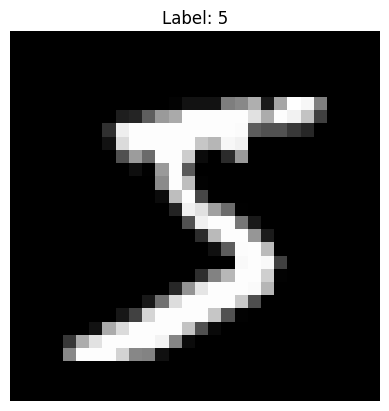

In [43]:
# Get the image and label
# Reshape the image back to 28x28 for display

image = x_train[0].reshape(28, 28)
label = y_train[0]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title(f"Label: {label}")
plt.axis('off')  # Hide the axes
plt.show()

In [44]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
import joblib
# Variables to store results
n_estimators_list = [10, 50, 100, 200, 300]
train_accuracies = []
test_accuracies = []

# Loop through different numbers of trees
for n_estimators in n_estimators_list:
    # Initialize the Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the model
    rf_clf.fit(x_train, y_train)

    # Predict on the training set
    y_train_pred = rf_clf.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test set
    y_test_pred = rf_clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Save the model using joblib
    joblib.dump(rf_clf, '/content/drive/MyDrive/dlytica/model/random_forest_model_'+str(n_estimators)+'.pkl')

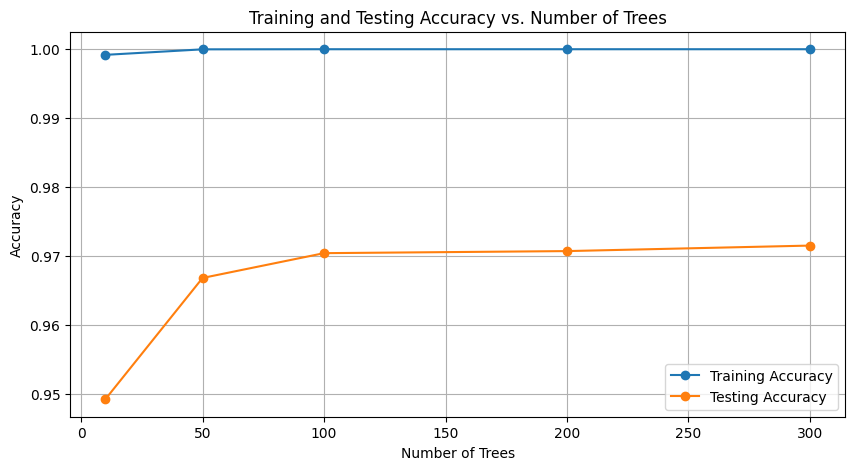

In [7]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Load the Random Forest model from the file
loaded_rf_clf_10 = joblib.load('/content/drive/MyDrive/dlytica/model/random_forest_model_10.pkl')

In [10]:
# Make predictions
y_pred = loaded_rf_clf_10.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.9492


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import joblib
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 967    0    2    2    0    3    2    0    3    1]
 [   1 1119    2    4    0    2    3    0    4    0]
 [   8    2  985    9    5    1    5    7   10    0]
 [   3    0   23  946    0   12    1   10   13    2]
 [   1    2    4    4  935    1    3    2    5   25]
 [  13    1    3   28    4  826    4    0    9    4]
 [  11    5    2    0    8    7  919    0    6    0]
 [   2    7   23    8    4    1    1  968    2   12]
 [   7    1   13   20    9    6    8    4  899    7]
 [   7    3    6   11   28    5    2   11    8  928]]


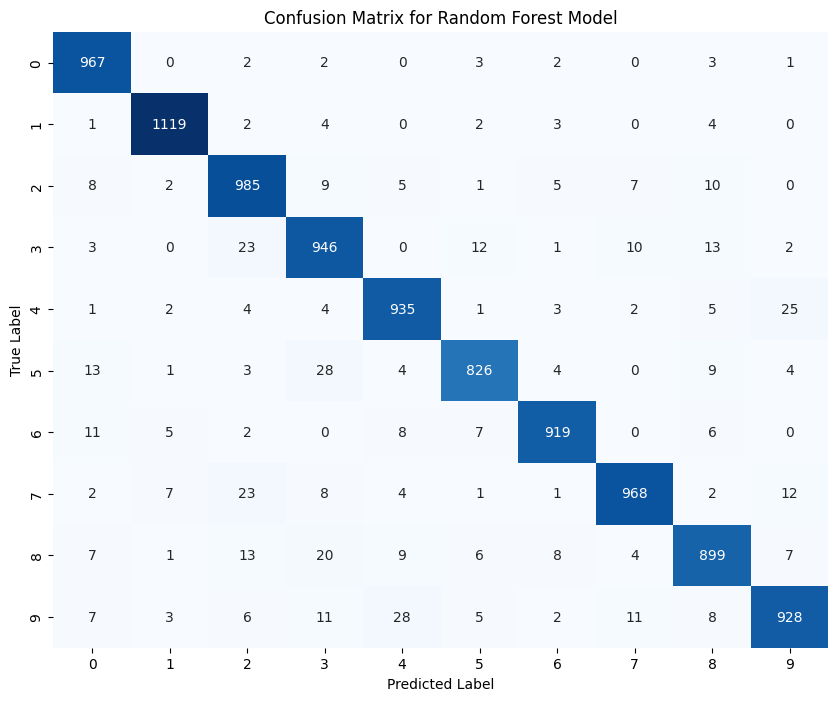

In [12]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [13]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9494
Recall: 0.9492
F1 Score: 0.9492


In [14]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.96      0.93      0.94       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [15]:
# Load the Random Forest model from the file
loaded_rf_clf_50 = joblib.load('/content/drive/MyDrive/dlytica/model/random_forest_model_50.pkl')

In [16]:
# Make predictions
y_pred = loaded_rf_clf_50.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.9668


In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1126    2    2    1    1    1    0    1    1]
 [   7    1  993    9    4    1    3    8    6    0]
 [   1    0   13  967    0    8    0    9    9    3]
 [   1    0    0    0  951    0    7    0    5   18]
 [   4    1    2   10    2  862    3    2    5    1]
 [   6    3    1    0    3    5  936    0    4    0]
 [   2    3   23    4    0    0    0  982    3   11]
 [   6    0    5   12    6    5    7    2  922    9]
 [   7    6    1   14   11    1    1    6    4  958]]


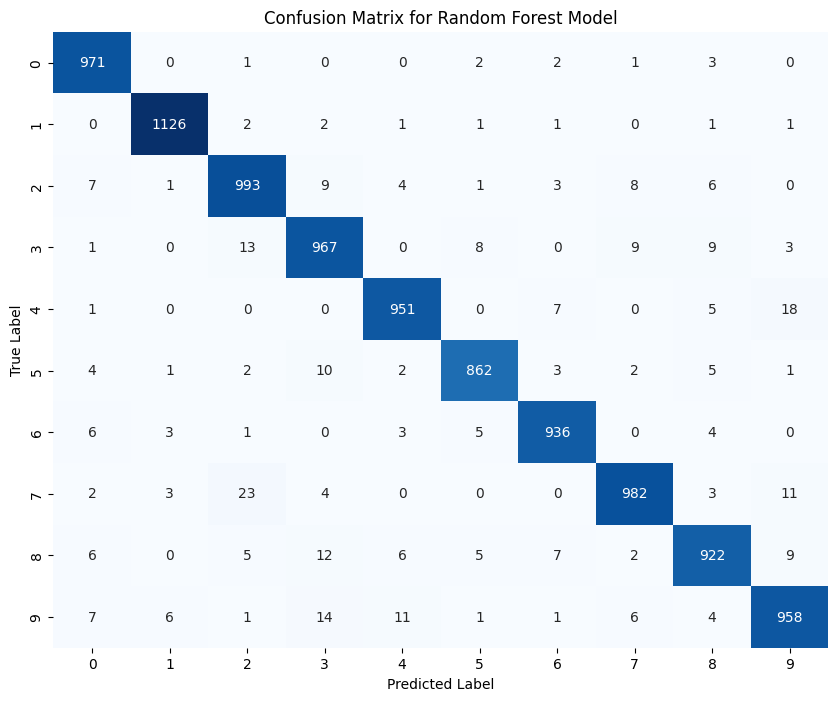

In [18]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [19]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9668
Recall: 0.9668
F1 Score: 0.9668


In [20]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [21]:
# Load the Random Forest model from the file
loaded_rf_clf_100 = joblib.load('/content/drive/MyDrive/dlytica/model/random_forest_model_100.pkl')

In [22]:
# Make predictions
y_pred = loaded_rf_clf_100.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.9704


In [23]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  989    2   10]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]


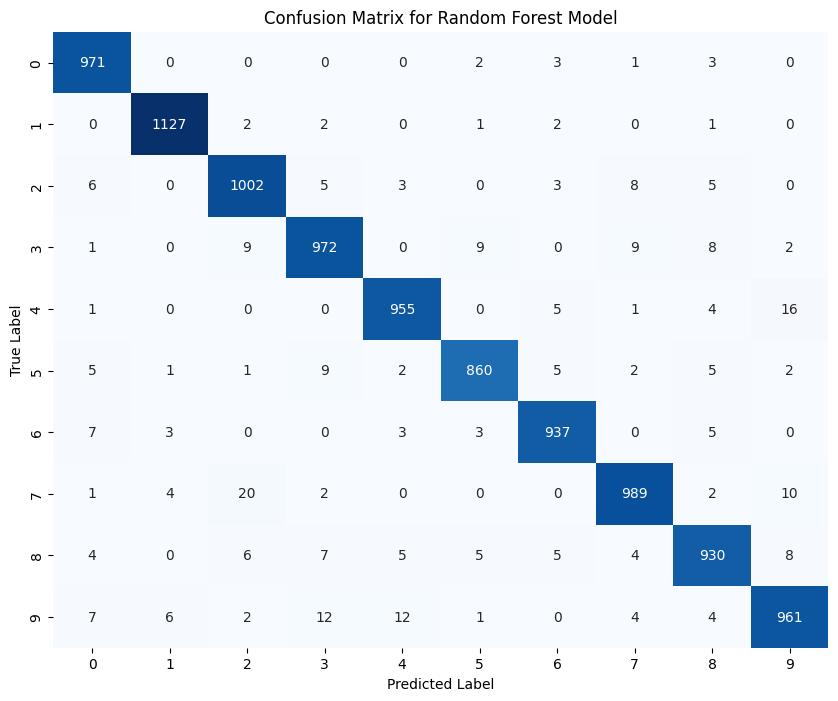

In [24]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [25]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9704
Recall: 0.9704
F1 Score: 0.9704


In [26]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [27]:
# Load the Random Forest model from the file
loaded_rf_clf_200 = joblib.load('/content/drive/MyDrive/dlytica/model/random_forest_model_200.pkl')

In [28]:
# Make predictions
y_pred = loaded_rf_clf_200.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.9707


In [29]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 970    0    0    0    0    2    2    1    4    1]
 [   0 1125    2    3    0    1    2    0    1    1]
 [   6    0 1000    5    3    0    4    8    6    0]
 [   1    0    9  969    0   10    0    9    9    3]
 [   1    0    1    0  956    0    4    1    3   16]
 [   3    0    1   13    2  860    4    2    5    2]
 [   6    3    1    0    2    4  939    0    3    0]
 [   1    3   17    0    1    0    0  996    2    8]
 [   4    0    6    9    3    5    5    3  930    9]
 [   7    5    2   11   12    1    0    5    4  962]]


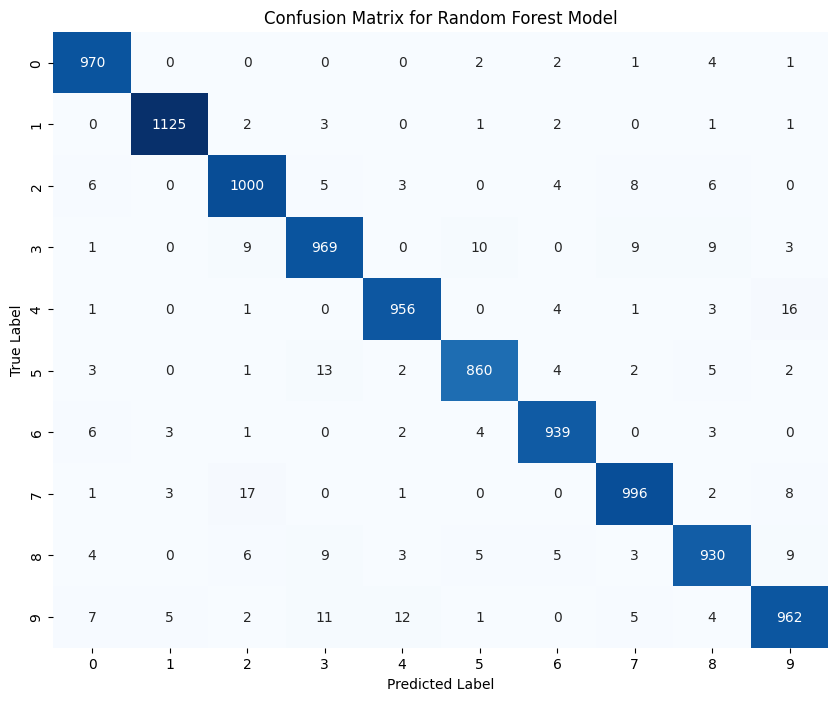

In [30]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [31]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9707
Recall: 0.9707
F1 Score: 0.9707


In [32]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [33]:
# Load the Random Forest model from the file
loaded_rf_clf_300 = joblib.load('/content/drive/MyDrive/dlytica/model/random_forest_model_300.pkl')

In [34]:
# Make predictions
y_pred = loaded_rf_clf_300.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.9715


In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 970    0    0    0    0    2    2    1    4    1]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   6    0 1000    4    3    0    4    8    7    0]
 [   0    0    9  972    0    8    0    9    9    3]
 [   1    0    1    0  957    0    4    1    3   15]
 [   3    0    1    9    2  865    5    2    4    1]
 [   8    3    1    0    3    4  936    0    3    0]
 [   1    3   18    0    1    0    0  994    2    9]
 [   4    0    6    7    3    4    5    3  933    9]
 [   5    5    2   10   11    2    1    5    4  964]]


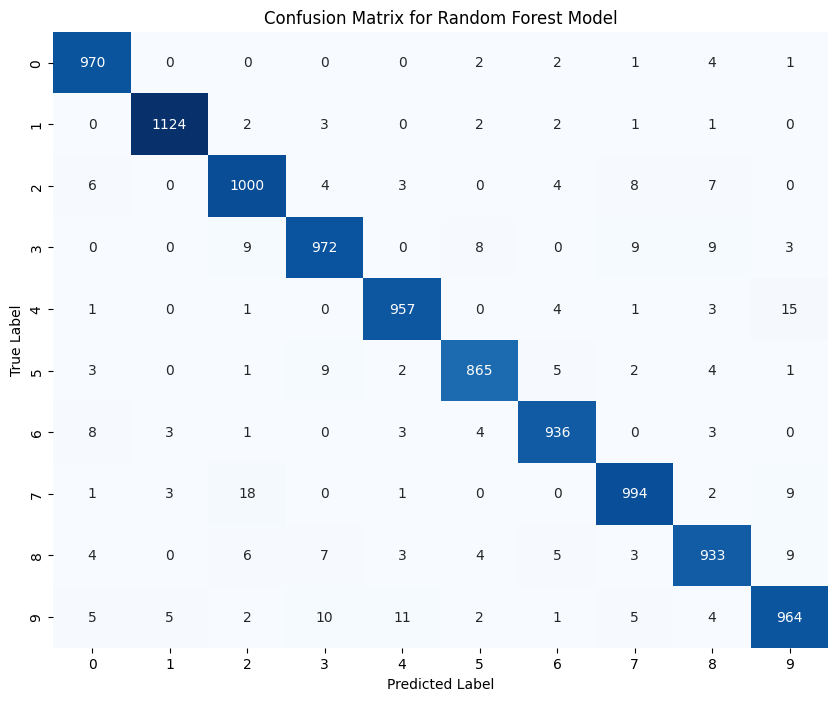

In [36]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [37]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9715
Recall: 0.9715
F1 Score: 0.9715


In [38]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

